# Week 4: Diagnostics

* Based on the material by David Ziganto, Linear Regression 101 (Part 3 - Assumptions & Evaluation)

In [1]:
# Load
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from sklearn.linear_model import LinearRegression

In [2]:
# Define

class Stats:
    
    def __init__(self, X, y, model):
        self.data = X
        self.target = y
        self.model = model
        ## degrees of freedom population dep. variable variance
        self._dft = X.shape[0] - 1   
        ## degrees of freedom population error variance
        self._dfe = X.shape[0] - X.shape[1] - 1  
    
    def sse(self):
        '''returns sum of squared errors (model vs actual)'''
        squared_errors = (self.target - self.model.predict(self.data)) ** 2
        return np.sum(squared_errors)
        
    def sst(self):
        '''returns total sum of squared errors (actual vs avg(actual))'''
        avg_y = np.mean(self.target)
        squared_errors = (self.target - avg_y) ** 2
        return np.sum(squared_errors)
    
    def r_squared(self):
        '''returns calculated value of r^2'''
        return 1 - self.sse()/self.sst()
    
    def adj_r_squared(self):
        '''returns calculated value of adjusted r^2'''
        return 1 - (self.sse()/self._dfe) / (self.sst()/self._dft)
    
def pretty_print_stats(stats_obj):
        '''returns report of statistics for a given model object'''
        items = ( ('sse:', stats_obj.sse()), ('sst:', stats_obj.sst()), 
                 ('r^2:', stats_obj.r_squared()), ('adj_r^2:', stats_obj.adj_r_squared()) )
        for item in items:
            print('{0:8} {1:.4f}'.format(item[0], item[1])) 

## 1a. Linear relationship

In [3]:
np.random.seed(20)
x = np.arange(20)
y = [x*2 + np.random.rand(1)*4 for x in range(20)]
x_reshape = x.reshape(-1,1)

In [5]:
linear = LinearRegression()
linear.fit(x_reshape, y);

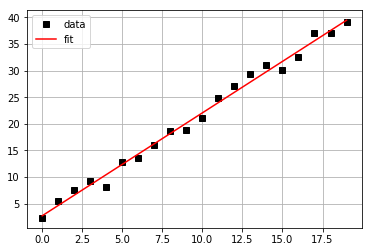

In [6]:
plt.plot(x_reshape, y,'ks',label='data')
plt.plot(x_reshape, linear.predict(x_reshape),'r-',label='fit')
plt.grid()
plt.legend();

### QUESTIONS 
* Compute the summary statistics (sse, sst, r^2 and adj_r^2), using e.g. 
    * `this_stat = Stats(x_reshape, y, linear)`
    * `pretty_print_stats(this_stat)`

* Comment on the fit and the values obtained

In [7]:
# Stats
this_stat = Stats(x_reshape, y, linear)
pretty_print_stats(this_stat)

sse:     24.3975
sst:     2502.9934
r^2:     0.9903
adj_r^2: 0.9897


## 1b. Nonlinear relationship

In [8]:
y_nonlinear = [x**3 + np.random.rand(1)*10 for x in range(20)]
nonlinear = LinearRegression()
nonlinear.fit(x_reshape, y_nonlinear);

### Data and  regression line

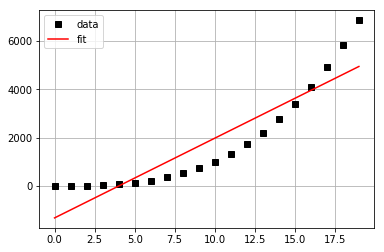

In [9]:
plt.plot(x_reshape, y_nonlinear,'ks',label='data')
plt.plot(x_reshape, nonlinear.predict(x_reshape),'r-',label='fit')
plt.grid()
plt.legend();

### QUESTIONS / TASKS
* Compute again the summary statistics (sse, sst, r^2 and adj_r^2).
* Plot the residuals agains the fitted values. You can use
    * `plt.plot(linear.predict(x_reshape), y-linear.predict(x_reshape), 'bo')`
    * `plt.plot(nonlinear.predict(x_reshape), y_nonlinear-nonlinear.predict(x_reshape), 'ro')`
* Comment on the fit and the values obtained
* Is the linear approach suitable for this data?

In [10]:
this_stat = Stats(x_reshape, y_nonlinear, nonlinear)
pretty_print_stats(this_stat)

sse:     14702044.1585
sst:     87205080.0323
r^2:     0.8314
adj_r^2: 0.8220


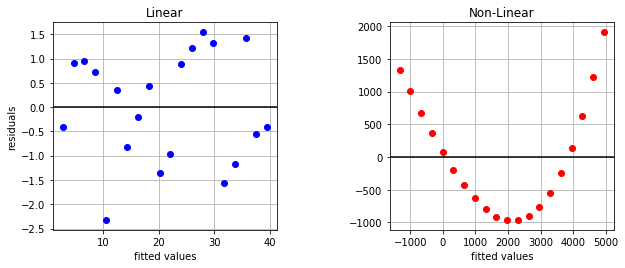

In [11]:
plt.subplot(121)
plt.plot(linear.predict(x_reshape), y-linear.predict(x_reshape), 'bo')
plt.axhline(y=0, color='k')
plt.title('Linear')
plt.xlabel('fitted values')
plt.ylabel('residuals')
plt.grid()

plt.subplot(122)
plt.plot(nonlinear.predict(x_reshape), y_nonlinear-nonlinear.predict(x_reshape), 'ro')
plt.axhline(y=0, color='k')
plt.title('Non-Linear')
plt.xlabel('fitted values')
plt.grid()

plt.subplots_adjust(top=0.8, bottom=0.08, left=0.0, right=1.3, hspace=5, wspace=0.5)

### Possible Solutions to Nonlinear Data
* Consider transforming the features
* Consider applying a different algorithm

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

poly = Pipeline([('poly', PolynomialFeatures(degree=3)),('linear', LinearRegression(fit_intercept=False))])
poly.fit(x_reshape, y_nonlinear);

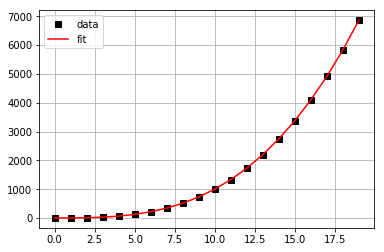

In [290]:
plt.plot(x_reshape, y_nonlinear,'ks',label='data')
plt.plot(x_reshape,poly.predict(x_reshape),'r-',label='fit')
plt.grid()
plt.legend()

### Questions/Taks:
* Compute again the summary statistics (sse, sst, r^2 and adj_r^2)
* comment on the obtained results. What is your conclusion here?

In [13]:
this_stat = Stats(x_reshape, y_nonlinear, poly)
pretty_print_stats(this_stat)

sse:     80.6927
sst:     87205080.0323
r^2:     1.0000
adj_r^2: 1.0000


## 2. Outliers

In [14]:
# We start by generating the data, including an outlier.
np.random.seed(20)
x = np.arange(20)
y = [x*2 + np.random.rand(1)*4 for x in range(20)]
y_outlier = y.copy()
y_outlier[8] = np.array([38])  ## insert outlier

x_reshape = x.reshape(-1,1)

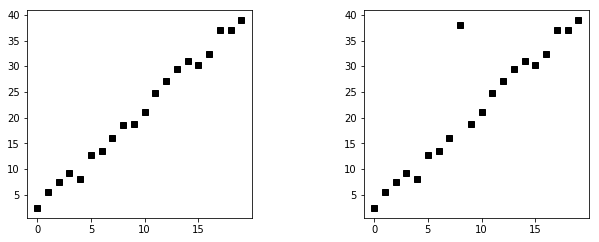

In [15]:
plt.subplot(121)
plt.plot(x,y,'ks')

plt.subplot(122)
plt.plot(x,y_outlier,'ks')
plt.subplots_adjust(top=0.8, bottom=0.08, left=0.0, right=1.3, hspace=5, wspace=0.5)

### Data and  regression lines

In [16]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(x_reshape, y)# sklearn expects 2D array so have to reshape x
x_reshape = x.reshape(-1,1)

# fit model w/standard data
linear_nooutlier = LinearRegression()
linear_nooutlier.fit(x_reshape, y)

# fit model w/outlier data
linear_outlier = LinearRegression()
linear_outlier.fit(x_reshape, y_outlier);

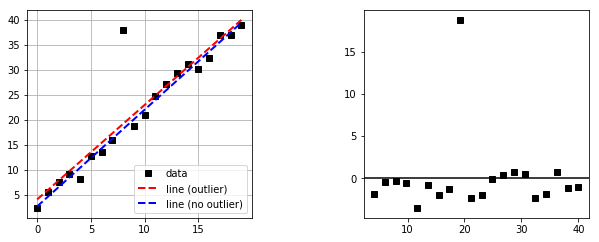

In [17]:
plt.subplot(121)
plt.plot(x,y_outlier,'ks', label='data')
plt.plot(x_reshape, linear_outlier.predict(x_reshape),'r--',lw=2, label='line (outlier)')
plt.plot(x_reshape, linear_nooutlier.predict(x_reshape),'b--',lw=2, label='line (no outlier)')
plt.grid(1)
plt.legend();

plt.subplot(122)
plt.plot(linear_outlier.predict(x_reshape), y_outlier-linear_outlier.predict(x_reshape), 'ks')
plt.axhline(y=0, color='k')

plt.subplots_adjust(top=0.8, bottom=0.08, left=0.0, right=1.3, hspace=5, wspace=0.5)

### Questions/Taks:
* How much does the regression line change when we add an outlier?
* Produce summary statiscits (sse, sst, r^2, adj_r^2) 
    * withiout an outlier
    * with an outlier
* How much is the outlier reflected in the summary statistics? 

In [19]:
# no outlier stats
s = Stats(x_reshape, y, linear_nooutlier)
pretty_print_stats(s)

sse:     24.3975
sst:     2502.9934
r^2:     0.9903
adj_r^2: 0.9897


In [20]:
# with outlier stats
s = Stats(x_reshape, y_outlier, linear_outlier)
pretty_print_stats(s)

sse:     396.3144
sst:     2764.0028
r^2:     0.8566
adj_r^2: 0.8487


### Possible Solutions to Nonlinear Data
* Investigate the outlier(s). Do NOT assume these cases are just bad data. Some outliers are true examples while others are data entry errors. You need to know which it is before proceeding.
* Consider imputing or removing outliers.

## 3. Constant variance

The assumption is that the means the errors exhibit constant variance. This is a key assumption of linear regression. However, often errors show some sort of growth, e.g. a fan-like shape in your residual plot. We consider this now. 

In [21]:
# Generate the data
np.random.seed(20)
x = np.arange(20)
y_const = [x*2 + np.random.rand(1) for x in range(20)]  ## constant variance
y_noconst = [x*2 + np.random.rand(1)*2*x for x in range(20)]  ## non-constant variance
x_reshape = x.reshape(-1,1)

In [22]:
# Compute the regression lines
linear_const = LinearRegression()
linear_const.fit(x_reshape, y_const)

linear_noconst = LinearRegression()
linear_noconst.fit(x_reshape, y_noconst);

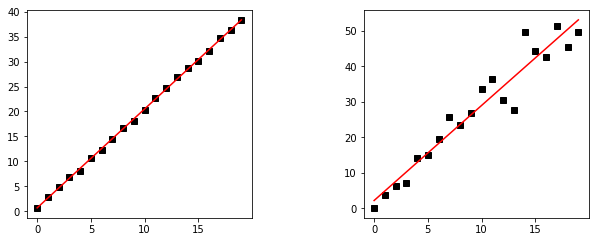

In [23]:
# Plot the two datasets (x_reshape,y_cost) and (x_reshape,y_nonconst) + lines
plt.subplot(121)
plt.plot(x_reshape,y_const,'ks', label='data')
plt.plot(x_reshape, linear_const.predict(x_reshape),'r-');

plt.subplot(122)
plt.plot(x_reshape,y_noconst,'ks', label='data')
plt.plot(x_reshape, linear_noconst.predict(x_reshape),'r-');

plt.subplots_adjust(top=0.8, bottom=0.08, left=0.0, right=1.3, hspace=5, wspace=0.5)

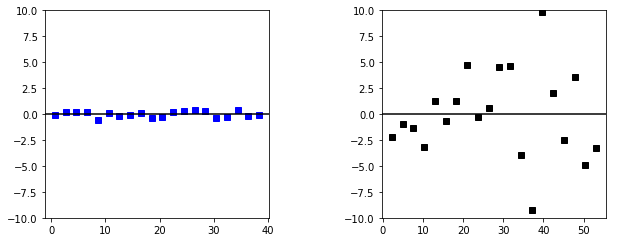

In [36]:
# Plot the residuals
plt.subplot(121)
plt.plot(linear_const.predict(x_reshape), y_const-linear_const.predict(x_reshape), 'bs')
plt.axhline(y=0, color='k')
plt.ylim(-10,10)

plt.subplot(122)
plt.plot(linear_noconst.predict(x_reshape), y_noconst-linear_noconst.predict(x_reshape), 'ks')
plt.axhline(y=0, color='k')
plt.ylim(-10,10)

plt.subplots_adjust(top=0.8, bottom=0.08, left=0.0, right=1.3, hspace=5, wspace=0.5)

### Possible Solutions to Nonlinear Data
* Consider log transforming the dependent variable

In [41]:
y_noconst_log  = np.log10(np.array(y_noconst) + 1e1)
x_reshape_log  = np.log10(np.array(x_reshape) + 1e1)

linear_noconst_log = LinearRegression()
linear_noconst_log.fit(x_reshape, y_noconst_log)

linear_noconst_log_log = LinearRegression()
linear_noconst_log_log.fit(x_reshape_log, y_noconst_log);

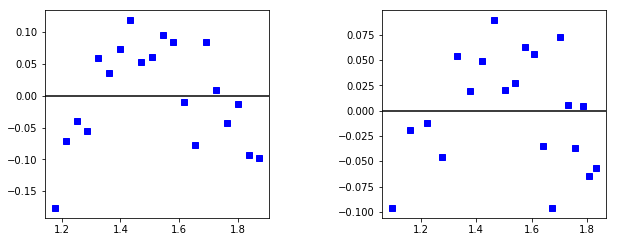

In [47]:
# Plot the residuals
plt.subplot(121)
plt.plot(linear_noconst_log.predict(x_reshape), y_noconst_log-linear_noconst_log.predict(x_reshape), 'bs')
plt.axhline(y=0, color='k')

plt.subplot(122)
plt.plot(linear_noconst_log_log.predict(x_reshape_log), y_noconst_log-linear_noconst_log_log.predict(x_reshape_log), 'bs')
plt.axhline(y=0, color='k')

plt.subplots_adjust(top=0.8, bottom=0.08, left=0.0, right=1.3, hspace=5, wspace=0.5)